# Data Challenge Project: Fraud Detection  

Credit card fraud is a common financial fraud that using a payment card to proceed a transaction with illegitimate nature. Researchers specialized in fraud dection often encouter such challenge: how to maximaize the transaction security with minimal hassles to clients. With the recent advance in machine learning and computation technology, this challenge can be addressed by implementing high accuracy fraud detection, which brings virtually no hassle to customers.       

This project intends to develop a predicative model based on machine learning algorithms in order to effectively detect fradulent transactions. Data are provided by [Kaggle.com](https://www.kaggle.com/c/ieee-fraud-detection)  

The whole kernel consists of five sections as follows:
1. Data cleaning
2. Feature selection
3. Data split and re-balance
4. Model selection
5. Concluding remarks

Question in a nutshell: a classification problem with numerous features as <b>X</b> and 'isFraud' 0 or 1 as <b>Y</b>  

In [1]:
cd ../../../../Desktop/Fraud2/

C:\Users\EzzZ\Desktop\Fraud2


In [2]:
import pandas as pd

In [3]:
id = pd.read_csv('train_identity.csv')
tn = pd.read_csv('train_transaction.csv')

## 1. Data cleaning

In [4]:
print(id.shape)
print(tn.shape)

(144233, 41)
(590540, 394)


In [5]:
id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
tn.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
id.isnull().sum().max()

139486

In [8]:
tn.isnull().sum().max()

552913

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### 1.1. Remove unpaired transaction (mismatch between identity and transaction datasets)

In [10]:
data = id.merge(tn, on= 'TransactionID', copy = False)

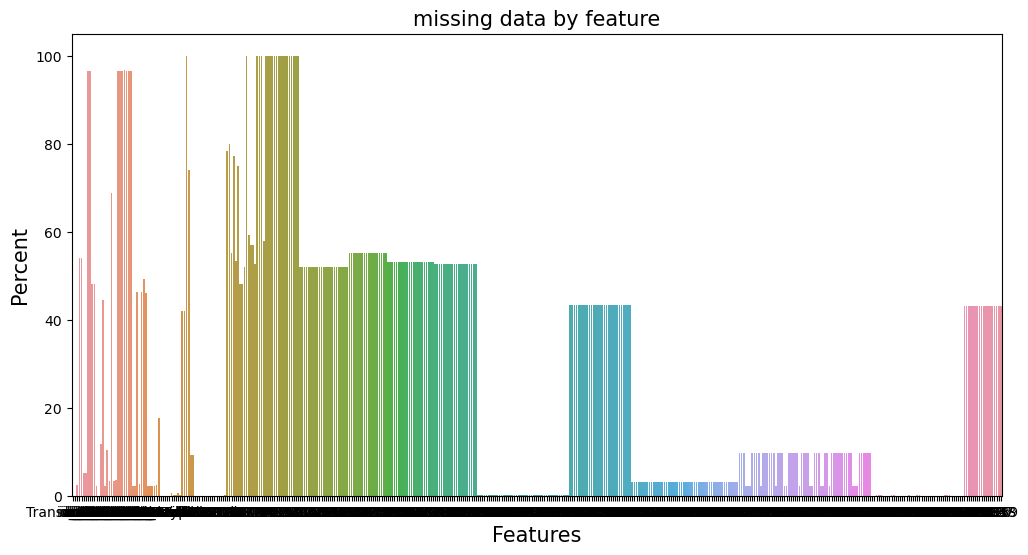

In [11]:
plt.style.use('default')
total=data.isnull().sum()
percent=data.isnull().sum()/data.isnull().count()*100
missing_data=pd.concat([total,percent],axis=1, keys=['total', 'percent'])
ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=missing_data.index,y=missing_data['percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent', fontsize=15)
plt.title('missing data by feature', fontsize=15)
plt.show()

## 2. Feature Selection

### 2.1. Remove columns with missing value

In [12]:
data_r = data.dropna(axis=1)

In [13]:
print(data_r.shape)

(144233, 22)


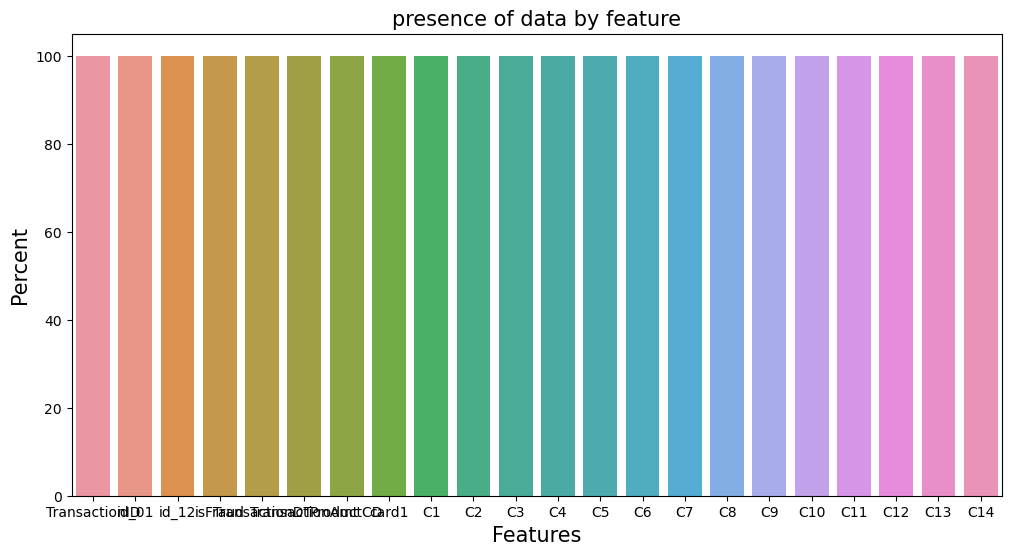

In [14]:
plt.style.use('default')
total=data_r.isnull().sum()
percent=(data_r.isnull().count() - data_r.isnull().sum())/data_r.isnull().count()*100
missing_data=pd.concat([total,percent],axis=1, keys=['total', 'percent'])
ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=missing_data.index,y=missing_data['percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent', fontsize=15)
plt.title('presence of data by feature', fontsize=15)
plt.show()

In [15]:
data_r.head()

,TransactionID,id_01,id_12,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,C1,C2,...,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,2987004,0.0,NotFound,0,86506,50.000,H,4497,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,2987008,-5.0,NotFound,0,86535,15.000,H,2803,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,2987010,-5.0,NotFound,0,86549,75.887,C,16496,1.0,4.0,...,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0
3,2987011,-5.0,NotFound,0,86555,16.495,C,4461,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,2987016,0.0,NotFound,0,86620,30.000,H,1790,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [16]:
for col in data_r.columns:
    print(col)

TransactionID
id_01
id_12
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14


### 2.2. Convert non-numerical/categorical features into numberical

In [17]:
from sklearn import preprocessing

In [18]:
for f in data_r.columns:
    if data_r[f].dtype=='object': 
        le = preprocessing.LabelEncoder()
        le.fit(list(data_r[f].values))
        data_r[f] = le.transform(list(data_r[f].values))

C:\Users\EzzZ\Anaconda3\envs\Py3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
data_r.head()

,TransactionID,id_01,id_12,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,C1,C2,...,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,2987004,0.0,1,0,86506,50.000,1,4497,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,2987008,-5.0,1,0,86535,15.000,1,2803,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,2987010,-5.0,1,0,86549,75.887,0,16496,1.0,4.0,...,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0
3,2987011,-5.0,1,0,86555,16.495,0,4461,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,2987016,0.0,1,0,86620,30.000,1,1790,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [20]:
print(data_r.shape)

(144233, 22)


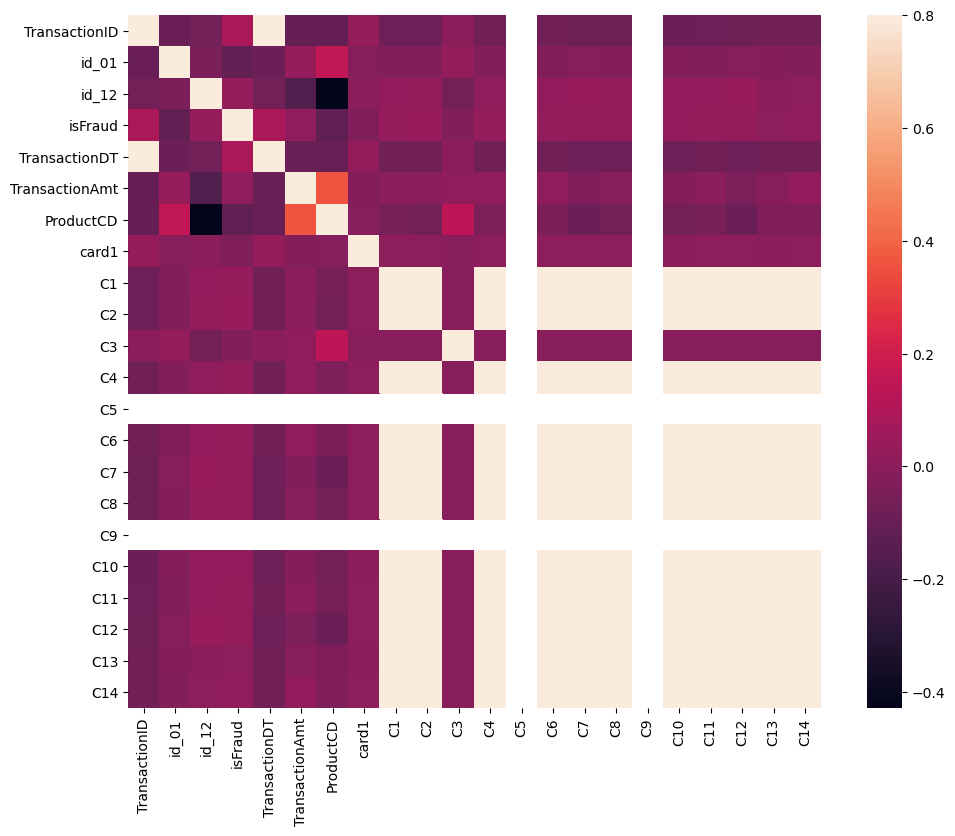

In [21]:
correlation_matrix = data_r.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

### <span style="color:blue;">There is no feature exhibiting noticeable correlation with "isFraud".</span>

## 3. Data Split and Re-balance

In [22]:
import numpy as np

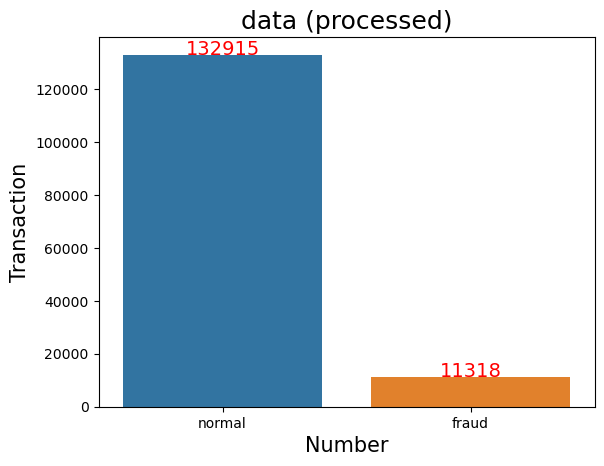

In [23]:
sns.countplot(x='isFraud',data=data_r)
plt.xticks( np.arange(2), ['normal', 'fraud'] )
plt.title('data (processed)',fontsize= 18)
plt.xlabel('Number',fontsize = 15)
plt.ylabel('Transaction',fontsize = 15)
labels = (data_r['isFraud'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v, str(v), ha = 'center', size = 14, color = 'r')
plt.show()

### 3.1 Split the data into train 80% and test 20%

In [24]:
normal = data_r[data_r['isFraud'] == 0]
fraud = data_r[data_r['isFraud'] == 1]

In [25]:
print(len(normal)*0.8, len(fraud)*0.8)

106332.0 9054.4


In [26]:
normal_1 = normal[:106332]
normal_2 = normal[106333:]
fraud_1 = fraud[:9054]
fraud_2 = fraud[9055:]
train = pd.concat([normal_1, fraud_1])
test = pd.concat([normal_2, fraud_2])

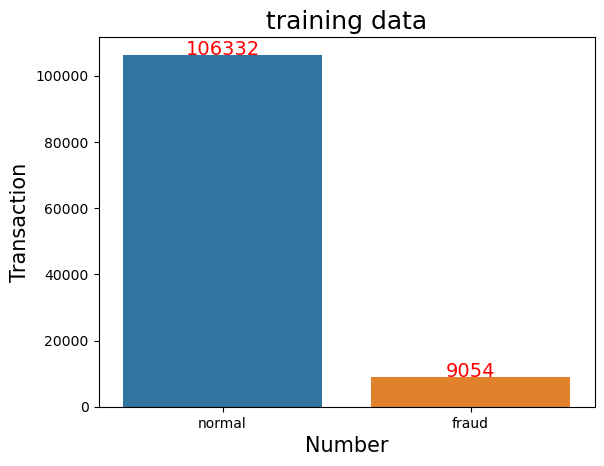

In [27]:
sns.countplot(x='isFraud',data=train)
plt.xticks( np.arange(2), ['normal', 'fraud'] )
plt.title('training data',fontsize= 18)
plt.xlabel('Number',fontsize = 15)
plt.ylabel('Transaction',fontsize = 15)
labels = (train['isFraud'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v, str(v), ha = 'center', size = 14, color = 'r')
plt.show()

- The training dataset is highly skewed.  Correlating the fradulent transactions with the features can be challenging. 
- Therefore,  the majority (normal) was undersampled to balance the dataset and to improve the computation efficiency.

### 3.2 Re-balance data

In [28]:
#shuffle a bit before undersample

normal_r = normal_1.sample(frac=1) 
normal_u = normal_r[:9054]
train_u = pd.concat([normal_u, fraud_1])

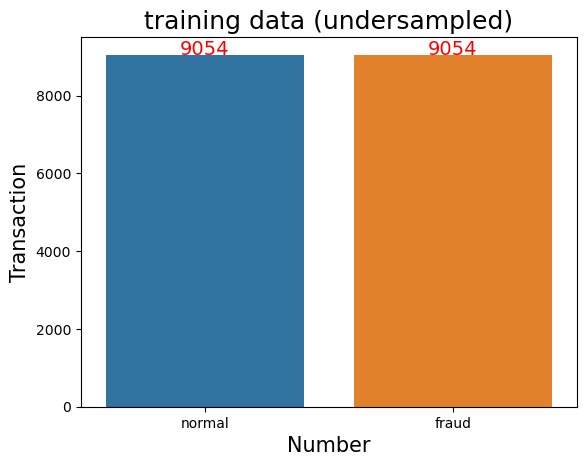

In [29]:
sns.countplot(x='isFraud',data=train_u)
plt.xticks( np.arange(2), ['normal', 'fraud'] )
plt.title('training data (undersampled)',fontsize= 18)
plt.xlabel('Number',fontsize = 15)
plt.ylabel('Transaction',fontsize = 15)
labels = (train_u['isFraud'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v, str(v), ha = 'center', size = 14, color = 'r')
plt.show()

# 4 Model Selection
Common classification model: 1) Logistic, 2) XGBoost, 3) Random forest

In [30]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [31]:
X_train = train_u.drop('isFraud', axis=1)
y_train = train_u['isFraud'].copy()
X_test = test.drop('isFraud', axis=1)
y_test = test['isFraud'].copy()

In [32]:
#logistic

LR = LogisticRegression(C=1e5)
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

C:\Users\EzzZ\Anaconda3\envs\Py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
# XGBoost
XG = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=9,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    missing=-999,
    random_state=2019,
    tree_method='hist')
XG.fit(X_train, y_train)
XG_pred = XG.predict(X_test)


In [34]:
# RandomForest
RF = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

#### F1 score is a function of precision and recall, and therefore is suitable to evaluate highly skewed data (e.g. most entries are negative 'isFraud' = 0 in this case).

In [35]:
#prediction result of testing data

score1 = metrics.f1_score(y_test, LR_pred)
score2 = metrics.f1_score(y_test, XG_pred)
score3 = metrics.f1_score(y_test, RF_pred)
print ('Logistic f1 score: %.5f' % score1 )
print ('XGboost f1 score: %.5f' % score2 )
print ('RandomForest f1 score: %.5f' % score3 )

Logistic f1 score: 0.14549
XGboost f1 score: 0.14710
RandomForest f1 score: 0.29025


In [36]:
#fitting result of training data

LR_fit = LR.predict(X_train)
XG_fit = XG.predict(X_train)
RF_fit = RF.predict(X_train)

score4 = metrics.f1_score(y_train, LR_fit)
score5 = metrics.f1_score(y_train, XG_fit)
score6 = metrics.f1_score(y_train, RF_fit)

print ('Logistic fitting: %.5f' % score4 )
print ('XGboost fitting: %.5f' % score5 )
print ('RandomForest fitting: %.5f' % score6 )

Logistic fitting: 0.60395
XGboost fitting: 0.97952
RandomForest fitting: 0.82254


#### Comparing the prediction and fitting results shows:
- All these models are unable to make practical prediction, considering their f1 scores (lower than 0.3).
- The XGboost model clearly overfitted: f1 score 0.98 for fitting training data.

# 5. Concluding remarks
This project aims to tackle the data challenge in fraud detection. The original data contain information of transaction and identification. Notably, the data are heavily skewed: 96.5% of transactions is non-fradulent. The X contains various features, which are often  In addition, the dataset contain missing data and categorical features. To overcome these challenges, undersampling was performed to balance the data; features with missing data were discarded; all the non-numberical features were transformed into numberical ones by encoder. To generate reliable model, original dataset was splited into two groups: 80% for training and 20% for testing. Three common classification models were trained: Logistic, XGboost, and Random Forest, which yielded f1 scores of 0.15, 0.15, and 0.29, respectively. This data challenge project suggests that these trained models are unfavorable for fraud detection in real world. One probable cause is the feature selection. More than half of the features were discarded because of the missing values. Several deleted features only have a small fraction of missing data. Thus, discarding these features severely deteriorates the data representativeness and the consequent model predicability. Future work will focus on the improvement of the feature selection.

References  
https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html  
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets  
https://www.kaggle.com/pavansanagapati/anomaly-detection-credit-card-fraud-analysis  
https://www.kaggle.com/shahules/tackling-class-imbalance  
https://scikit-learn.org/  